In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pathlib import Path
#import geopandas as gpd

import os
import requests, zipfile, io
import gc
import warnings
warnings.filterwarnings('ignore')

In [28]:
# df1 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detect/detected_1.csv')
# df2 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detect/detected_2.csv')
# df3 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detect/detected_3.csv')
# df4 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detect/detected_4.csv')
# df5 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detect/detected_5.csv')
# df6 = pd.read_csv('C:/Users/lsd92/Codes/capstone/csv_data/detect/detected_6.csv')
# pdList = [df1, df2, df3, df4, df5, df6]  # List of your dataframes
# df = pd.concat(pdList)
# df


csv_path = Path("raw_data.csv")
df = pd.read_csv(csv_path)
df.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences
0,2022-01-27 21:21:29,37.868783,122.258789,0.0,Bancroft_Vids_1005.mp4,Bancroft_Vids_1005_1.jpg,bus,1,0.554948,0.506481,0.031771,0.055556,0.741122
1,2022-01-27 21:21:29,37.868783,122.258789,0.0,Bancroft_Vids_1005.mp4,Bancroft_Vids_1005_2.jpg,bus,1,0.554948,0.506481,0.031771,0.055556,0.732408
2,2022-01-27 21:21:29,37.868783,122.258789,0.0,Bancroft_Vids_1005.mp4,Bancroft_Vids_1005_3.jpg,bus,1,0.555208,0.505093,0.032292,0.056481,0.750731
3,2022-01-27 21:21:29,37.868783,122.258789,0.0,Bancroft_Vids_1005.mp4,Bancroft_Vids_1005_4.jpg,bus,1,0.554948,0.506019,0.031771,0.054630,0.754826
4,2022-01-27 21:21:29,37.868783,122.258789,0.0,Bancroft_Vids_1005.mp4,Bancroft_Vids_1005_5.jpg,bus,1,0.554948,0.506019,0.030729,0.054630,0.744530


In [29]:
# df.reset_index(drop=True).to_csv('raw_data.csv', index=False) 

In [30]:
df['time'] = pd.to_datetime(df['time'])
df = df[df['confidences']>=0.85]
df= df[df['latitude'] < 180]
df= df[df['longitude'] < 180]
df['longitude'] = df['longitude']*-1
#df = df[df["obj_class_name"].str.contains("bus")==False]
df['box_area'] = df['w'] * df['h'] 
df.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,box_area
1752,2022-01-27 22:16:33,37.869183,-122.255644,14.4841,Bancroft_Vids_1022.mp4,Bancroft_Vids_1022_17.jpg,bus,1,0.567187,0.504630,0.031250,0.062963,0.853316,0.001968
1754,2022-01-27 22:16:33,37.869183,-122.255644,14.4841,Bancroft_Vids_1022.mp4,Bancroft_Vids_1022_19.jpg,bus,1,0.568229,0.504167,0.032292,0.065741,0.860934,0.002123
1761,2022-01-27 22:16:33,37.869183,-122.255644,14.4841,Bancroft_Vids_1022.mp4,Bancroft_Vids_1022_26.jpg,bus,1,0.566406,0.504630,0.029687,0.061111,0.852488,0.001814
1767,2022-01-27 22:16:34,37.869175,-122.255700,16.0934,Bancroft_Vids_1022.mp4,Bancroft_Vids_1022_32.jpg,bus,1,0.565885,0.503704,0.033854,0.064815,0.853566,0.002194
1768,2022-01-27 22:16:34,37.869175,-122.255700,16.0934,Bancroft_Vids_1022.mp4,Bancroft_Vids_1022_33.jpg,bus,1,0.565885,0.504167,0.032812,0.063889,0.858380,0.002096


In [31]:
df['is_on_bus_line'] = (df['longitude'] <= -122.258329) & (df['x'] > 0.5) & (df['obj_class_name'] != 'bus' )
df[(df['is_on_bus_line'] == True)]



,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,box_area,is_on_bus_line
5368,2022-01-28 16:55:03,37.868547,-122.260511,22.5308,Bancroft_Vids_1105.mp4,Bancroft_Vids_1105_691.jpg,fedex_truck,4,0.626562,0.503704,0.051042,0.124074,0.867984,0.006333,True
5369,2022-01-28 16:55:03,37.868547,-122.260511,22.5308,Bancroft_Vids_1105.mp4,Bancroft_Vids_1105_692.jpg,fedex_truck,4,0.626302,0.502778,0.051562,0.124074,0.857054,0.006398,True
5371,2022-01-28 16:55:03,37.868547,-122.260511,22.5308,Bancroft_Vids_1105.mp4,Bancroft_Vids_1105_694.jpg,fedex_truck,4,0.627865,0.504630,0.050521,0.122222,0.865926,0.006175,True
5372,2022-01-28 16:55:03,37.868547,-122.260511,22.5308,Bancroft_Vids_1105.mp4,Bancroft_Vids_1105_695.jpg,fedex_truck,4,0.629427,0.503704,0.050521,0.125926,0.863452,0.006362,True
5375,2022-01-28 16:55:03,37.868547,-122.260511,22.5308,Bancroft_Vids_1105.mp4,Bancroft_Vids_1105_698.jpg,fedex_truck,4,0.628906,0.500926,0.054688,0.129630,0.857597,0.007089,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103393,2022-01-20 16:55:27,37.867819,-122.266458,14.4841,Bancroft_Vids_97.mp4,Bancroft_Vids_97_1254.jpg,fedex_truck,4,0.826563,0.678704,0.346875,0.388889,0.905363,0.134896,True
4103397,2022-01-20 16:55:27,37.867819,-122.266458,14.4841,Bancroft_Vids_97.mp4,Bancroft_Vids_97_1256.jpg,fedex_truck,4,0.827083,0.686111,0.343750,0.370370,0.863474,0.127315,True
4103400,2022-01-20 16:55:27,37.867819,-122.266458,14.4841,Bancroft_Vids_97.mp4,Bancroft_Vids_97_1257.jpg,fedex_truck,4,0.827865,0.686574,0.344271,0.373148,0.921869,0.128464,True
4103411,2022-01-20 16:55:28,37.867819,-122.266458,14.4841,Bancroft_Vids_97.mp4,Bancroft_Vids_97_1263.jpg,fedex_truck,4,0.839844,0.688426,0.320312,0.354630,0.874514,0.113592,True


In [32]:
# remove duplicate
df = df.loc[df.groupby(['time', 'original_file', "obj_class_name"])['box_area'].idxmax()]


# remove zero speed
df = df[df['speed'] != 0]

# # speed unit from km/h to m/s
# df['speed_mps'] = df['speed']/3.6

# # normalize count
# # Assume that the camera can see up to 20 meters
# # in GRMN_Bancroft_48.MP4 there are 4 second contains fedex and the speed is 20 km/h
# # 4* (20/3.6) = 20 
# #df[df['original_file'] == 'GRMN_Bancroft_48.MP4']
# #print(df[df['obj_class_name'] == 'fedex_truck']['original_file'])
# max_seen = 20
# df['normalized_count'] = df['speed_mps']/max_seen


#df.to_csv('filtered_out.csv') 

In [33]:
df['should_keep'] = False

## remove duplicate
splits = list(df.groupby(["original_file", "obj_class_name"]))
results = []

for split in splits:
    frame = split[1]
    n = frame.shape[0]
    i = 0
    while i < n:
        current = frame.iloc[i]
        if i + 1 < n:
            next = frame.iloc[i + 1]
            if (pd.Timedelta(next['time'] - current['time']).seconds) > 3:
                frame.iloc[i, df.columns.get_loc('should_keep')] = True
        else:
            frame.iloc[i, df.columns.get_loc('should_keep')] = True
        
        i += 1
    frame = frame[frame['should_keep'] == True]
    results.append(frame)


df = pd.concat(results)
        
df = df.drop(['should_keep'], axis=1)
df

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,w,h,confidences,box_area,is_on_bus_line
3392690,2022-01-27 21:44:20,37.868450,-122.254506,22.5308,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1472.jpg,amazon_truck,6,0.877604,0.460185,0.241667,0.718518,0.901948,0.173642,False
3392647,2022-01-27 21:44:18,37.868339,-122.254472,19.3121,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1439.jpg,bus,1,0.768229,0.490741,0.168750,0.294444,0.906506,0.049688,False
1862775,2022-01-27 21:46:11,37.868792,-122.258781,16.0934,Bancroft_Vids_1013.mp4,Bancroft_Vids_1013_1200.jpg,bus,1,0.878385,0.454630,0.240104,0.762963,0.917658,0.183191,False
368693,2022-01-27 22:15:57,37.869117,-122.254606,12.8747,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_720.jpg,bus,1,0.050521,0.612500,0.101042,0.160185,0.901372,0.016185,False
368967,2022-01-27 22:16:11,37.869292,-122.254806,1.6093,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_1169.jpg,bus,1,0.463802,0.550000,0.116146,0.212963,0.928866,0.024735,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105042,2022-01-27 19:51:21,37.868506,-122.260872,16.0934,Bancroft_Vids_974.mp4,Bancroft_Vids_974_1729.jpg,bus,1,0.932813,0.495370,0.134375,0.664815,0.858798,0.089334,False
4105174,2022-01-27 20:16:54,37.869047,-122.254547,1.6093,Bancroft_Vids_978.mp4,Bancroft_Vids_978_844.jpg,fedex_truck,4,0.251563,0.622222,0.135417,0.146296,0.873732,0.019811,False
1860536,2022-01-27 20:48:11,37.867922,-122.254242,16.0934,Bancroft_Vids_987.mp4,Bancroft_Vids_987_1341.jpg,fedex_truck,4,0.859375,0.614352,0.278125,0.432407,0.874393,0.120263,False
367978,2022-01-27 20:51:24,37.868792,-122.258306,12.8747,Bancroft_Vids_990.mp4,Bancroft_Vids_990_1690.jpg,fedex_truck,4,0.891667,0.601852,0.214583,0.322222,0.917160,0.069144,False


In [34]:
# add date week and hour info
date = pd.to_datetime(df['time']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
df['year'] = date.dt.year
df['month'] = date.dt.month
df['day'] = date.dt.day
df['weekday'] = date.dt.weekday + 1
df['hour'] = date.dt.hour
df['date'] = date.dt.date

In [35]:
df.to_csv('filtered_out.csv', index=False) 

In [36]:
total_count = df['obj_class_name'].value_counts()
total_count

bus             3715
fedex_truck     1102
amazon_truck     830
ups_truck        422
Name: obj_class_name, dtype: int64

In [37]:
on_bus_line = df[(df['is_on_bus_line'] == True)]['obj_class_name'].value_counts()
display(on_bus_line)
on_bus_line/total_count

fedex_truck     265
amazon_truck    165
ups_truck        91
Name: obj_class_name, dtype: int64

amazon_truck    0.198795
bus                  NaN
fedex_truck     0.240472
ups_truck       0.215640
Name: obj_class_name, dtype: float64

In [38]:

#df[['date', 'normalized_count', 'obj_class_name']].groupby(['date', 'obj_class_name']).count()


,date,obj_class_name,count
0,2021-10-04,amazon_truck,7
1,2021-10-04,bus,95
2,2021-10-04,fedex_truck,47
3,2021-10-04,ups_truck,17
4,2021-10-05,bus,15
...,...,...,...
210,2022-03-07,ups_truck,4
211,2022-03-09,amazon_truck,7
212,2022-03-09,bus,10
213,2022-03-09,fedex_truck,7


Text(0.5, 1.0, 'Average of different types of vehicles dashcam detected per day')

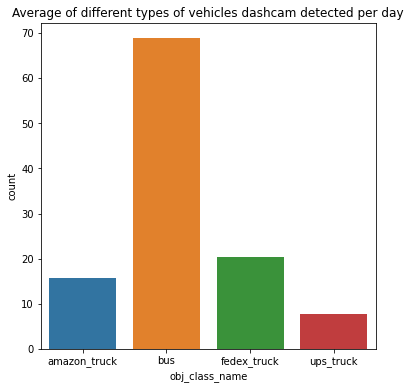

In [39]:
count = df[['date', 'obj_class_name', 'obj_class']].groupby(['date', 'obj_class_name']).count().reset_index().rename(columns={'obj_class':'count'})
display(count)

plt.figure(figsize=(6, 6))

sns.barplot(x="obj_class_name", y="count", data=count.groupby('obj_class_name').mean().reset_index(), capsize=.2)
plt.title('Average of different types of vehicles dashcam detected per day')

In [40]:
# display(df['latitude'].value_counts())
# display(df['longitude'].value_counts())

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles')

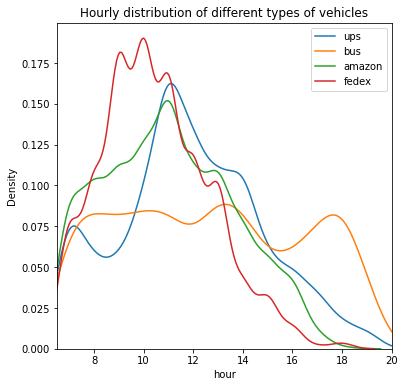

In [41]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = df[['hour', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = df[['hour', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = df[['hour', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles')

<AxesSubplot:xlabel='hour', ylabel='Density'>

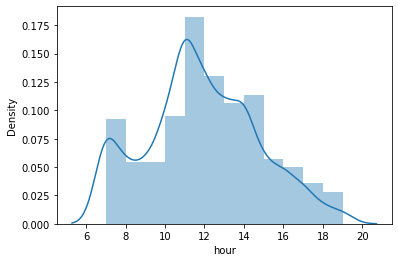

In [42]:
sns.distplot(ups['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='ups')

<AxesSubplot:xlabel='hour', ylabel='Density'>

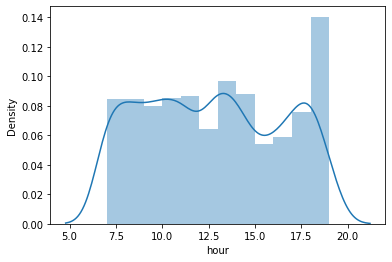

In [43]:
sns.distplot(bus['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='bus')

<AxesSubplot:xlabel='hour', ylabel='Density'>

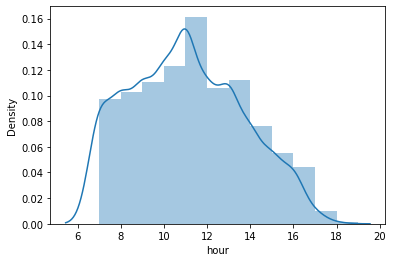

In [44]:
sns.distplot(amazon['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='amazon')

<AxesSubplot:xlabel='hour', ylabel='Density'>

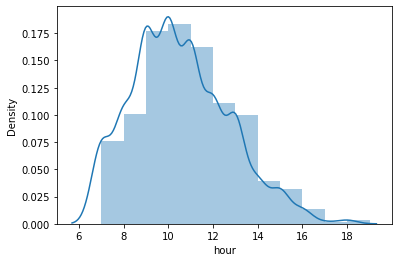

In [45]:
sns.distplot(fedex['hour'], bins=bins, kde=True, kde_kws=kde_kws, label='fedex')

Text(0.5, 1.0, 'Weekday distribution of different types of vehicles')

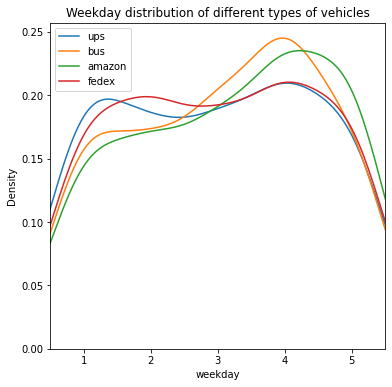

In [46]:
plt.figure(figsize=(6, 6))
ups = df[['weekday', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = df[['weekday', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = df[['weekday', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = df[['weekday', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.xlim([0.5, 5.5])
plt.legend();
plt.title('Weekday distribution of different types of vehicles')

Text(0.5, 1.0, 'Longitude distribution of different types of vehicles')

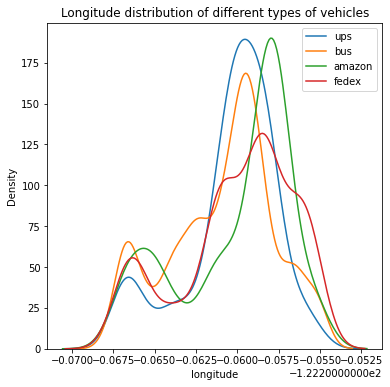

In [47]:
plt.figure(figsize=(6, 6))
l_filter = df[df['longitude'] <= -122.255]
ups = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'ups_truck'")
bus = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'bus'")
amazon = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'amazon_truck'")
fedex = l_filter[['longitude', 'obj_class_name']].query("obj_class_name == 'fedex_truck'")

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();
plt.title('Longitude distribution of different types of vehicles')

In [48]:
df.head()
df_with_side_of_road = df
conditions = [
    (df_with_side_of_road['x'] <= 0.45),
    (df_with_side_of_road['x'] >= 0.55)]
choices = ['left', 'right']
df_with_side_of_road['side_of_road'] = np.select(conditions, choices, default='none')

In [49]:
df_with_side_of_road.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,...,confidences,box_area,is_on_bus_line,year,month,day,weekday,hour,date,side_of_road
3392690,2022-01-27 21:44:20,37.868450,-122.254506,22.5308,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1472.jpg,amazon_truck,6,0.877604,0.460185,...,0.901948,0.173642,False,2022,1,27,4,13,2022-01-27,right
3392647,2022-01-27 21:44:18,37.868339,-122.254472,19.3121,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1439.jpg,bus,1,0.768229,0.490741,...,0.906506,0.049688,False,2022,1,27,4,13,2022-01-27,right
1862775,2022-01-27 21:46:11,37.868792,-122.258781,16.0934,Bancroft_Vids_1013.mp4,Bancroft_Vids_1013_1200.jpg,bus,1,0.878385,0.454630,...,0.917658,0.183191,False,2022,1,27,4,13,2022-01-27,right
368693,2022-01-27 22:15:57,37.869117,-122.254606,12.8747,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_720.jpg,bus,1,0.050521,0.612500,...,0.901372,0.016185,False,2022,1,27,4,14,2022-01-27,left
368967,2022-01-27 22:16:11,37.869292,-122.254806,1.6093,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_1169.jpg,bus,1,0.463802,0.550000,...,0.928866,0.024735,False,2022,1,27,4,14,2022-01-27,none


In [50]:
on_the_left = df[(df['side_of_road'] == "left")]['obj_class_name'].value_counts()
display(on_the_left)


bus             1290
fedex_truck      417
amazon_truck     369
ups_truck        254
Name: obj_class_name, dtype: int64

In [51]:
on_the_right = df[(df['side_of_road'] == "right")]['obj_class_name'].value_counts()
display(on_the_right)

bus             1518
fedex_truck      648
amazon_truck     435
ups_truck        139
Name: obj_class_name, dtype: int64

In [52]:
df.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,...,confidences,box_area,is_on_bus_line,year,month,day,weekday,hour,date,side_of_road
3392690,2022-01-27 21:44:20,37.868450,-122.254506,22.5308,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1472.jpg,amazon_truck,6,0.877604,0.460185,...,0.901948,0.173642,False,2022,1,27,4,13,2022-01-27,right
3392647,2022-01-27 21:44:18,37.868339,-122.254472,19.3121,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1439.jpg,bus,1,0.768229,0.490741,...,0.906506,0.049688,False,2022,1,27,4,13,2022-01-27,right
1862775,2022-01-27 21:46:11,37.868792,-122.258781,16.0934,Bancroft_Vids_1013.mp4,Bancroft_Vids_1013_1200.jpg,bus,1,0.878385,0.454630,...,0.917658,0.183191,False,2022,1,27,4,13,2022-01-27,right
368693,2022-01-27 22:15:57,37.869117,-122.254606,12.8747,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_720.jpg,bus,1,0.050521,0.612500,...,0.901372,0.016185,False,2022,1,27,4,14,2022-01-27,left
368967,2022-01-27 22:16:11,37.869292,-122.254806,1.6093,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_1169.jpg,bus,1,0.463802,0.550000,...,0.928866,0.024735,False,2022,1,27,4,14,2022-01-27,none


Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road')

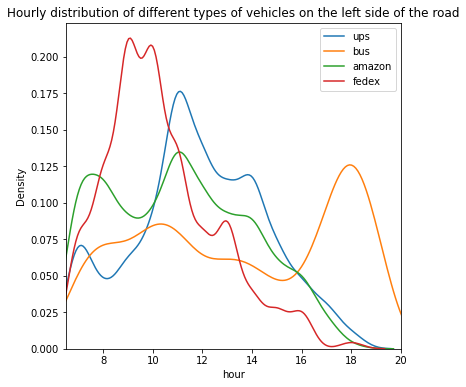

In [53]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'left'")
bus = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'left'")
amazon = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left'")
fedex = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road')

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the right side of the road')

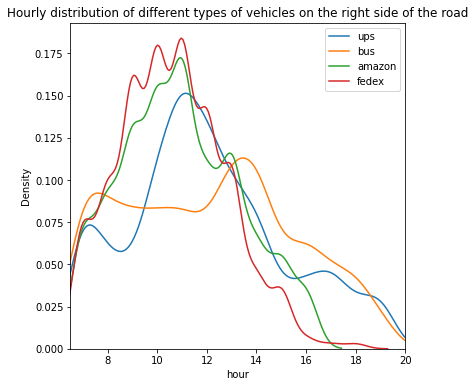

In [54]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'right'")
bus = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'right'")
amazon = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right'")
fedex = df[['hour', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'right'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the right side of the road')

Text(0.5, 1.0, 'Weekday distribution of different types of vehicles on the left side of the road')

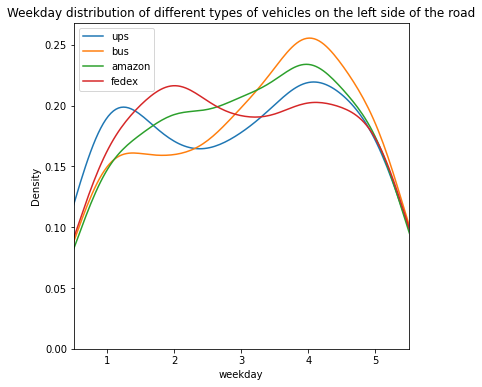

In [55]:
plt.figure(figsize=(6, 6))
ups = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'left'")
bus = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'left'")
amazon = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left'")
fedex = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.xlim([0.5, 5.5])
plt.legend();
plt.title('Weekday distribution of different types of vehicles on the left side of the road')

Text(0.5, 1.0, 'Weekday distribution of different types of vehicles on the right side of the road')

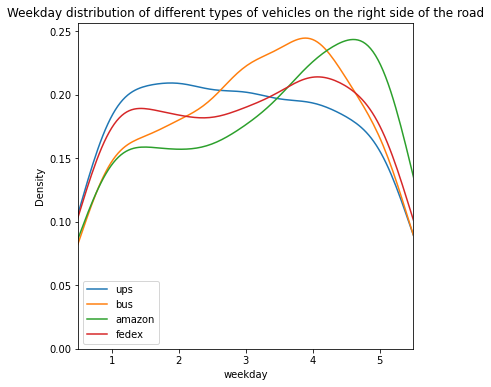

In [56]:
plt.figure(figsize=(6, 6))
ups = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'right'")
bus = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'right'")
amazon = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right'")
fedex = df[['weekday', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'right'")


sns.kdeplot(data = ups['weekday'], bw=0.4, label='ups')
sns.kdeplot(data = bus['weekday'], bw=0.4, label='bus')
sns.kdeplot(data = amazon['weekday'], bw=0.4, label='amazon')
sns.kdeplot(data = fedex['weekday'], bw=0.4, label='fedex')
plt.xlim([0.5, 5.5])
plt.legend();
plt.title('Weekday distribution of different types of vehicles on the right side of the road')

Text(0.5, 1.0, 'Longitude distribution of different types of vehicles on the left side of the road')

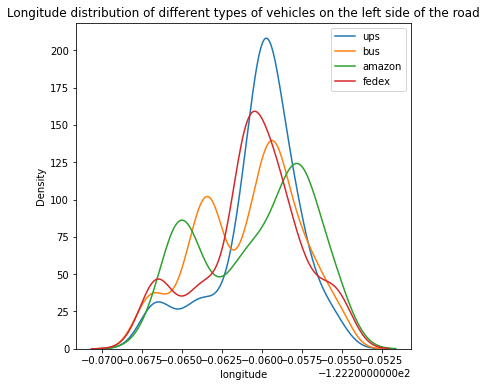

In [57]:
plt.figure(figsize=(6, 6))
l_filter = df[df['longitude'] <= -122.255]
ups = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'left'")
bus = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'left'")
amazon = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left'")
fedex = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left'")

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();
plt.title('Longitude distribution of different types of vehicles on the left side of the road')

Text(0.5, 1.0, 'Longitude distribution of different types of vehicles on the right side of the road')

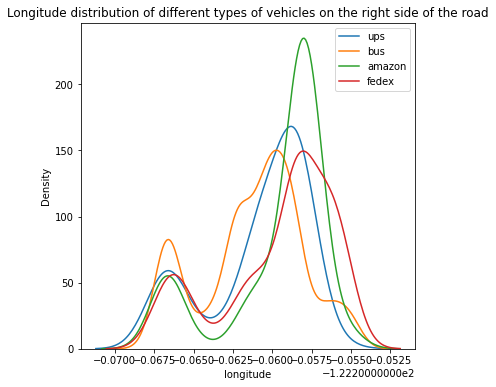

In [58]:
plt.figure(figsize=(6, 6))
l_filter = df[df['longitude'] <= -122.255]
ups = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'ups_truck' & side_of_road == 'right'")
bus = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'bus' & side_of_road == 'right'")
amazon = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right'")
fedex = l_filter[['longitude', 'obj_class_name', 'side_of_road']].query("obj_class_name == 'fedex_truck' & side_of_road == 'right'")

sns.kdeplot(data = ups['longitude'],  label='ups')
sns.kdeplot(data = bus['longitude'],  label='bus')
sns.kdeplot(data = amazon['longitude'],  label='amazon')
sns.kdeplot(data = fedex['longitude'],  label='fedex')
plt.legend();
plt.title('Longitude distribution of different types of vehicles on the right side of the road')

In [59]:
conditions = [
    ((df['longitude'] >= -122.267864) & (df['longitude'] <= -122.259921)),
    ((df['longitude'] >= -122.259921) & (df['longitude'] <= -122.257163)),
    ((df['longitude'] >= -122.257163) & (df['longitude'] <= -122.254609))]
choices = ['Shattuck', 'Bus Stop', 'College Ave']
df['Segment'] = np.select(conditions, choices, default='none')

In [60]:
df.head()

,time,latitude,longitude,speed,original_file,image_file,obj_class_name,obj_class,x,y,...,box_area,is_on_bus_line,year,month,day,weekday,hour,date,side_of_road,Segment
3392690,2022-01-27 21:44:20,37.868450,-122.254506,22.5308,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1472.jpg,amazon_truck,6,0.877604,0.460185,...,0.173642,False,2022,1,27,4,13,2022-01-27,right,none
3392647,2022-01-27 21:44:18,37.868339,-122.254472,19.3121,Bancroft_Vids_1011.mp4,Bancroft_Vids_1011_1439.jpg,bus,1,0.768229,0.490741,...,0.049688,False,2022,1,27,4,13,2022-01-27,right,none
1862775,2022-01-27 21:46:11,37.868792,-122.258781,16.0934,Bancroft_Vids_1013.mp4,Bancroft_Vids_1013_1200.jpg,bus,1,0.878385,0.454630,...,0.183191,False,2022,1,27,4,13,2022-01-27,right,Bus Stop
368693,2022-01-27 22:15:57,37.869117,-122.254606,12.8747,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_720.jpg,bus,1,0.050521,0.612500,...,0.016185,False,2022,1,27,4,14,2022-01-27,left,none
368967,2022-01-27 22:16:11,37.869292,-122.254806,1.6093,Bancroft_Vids_1021.mp4,Bancroft_Vids_1021_1169.jpg,bus,1,0.463802,0.550000,...,0.024735,False,2022,1,27,4,14,2022-01-27,none,College Ave


Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road in the Shattuck segment')

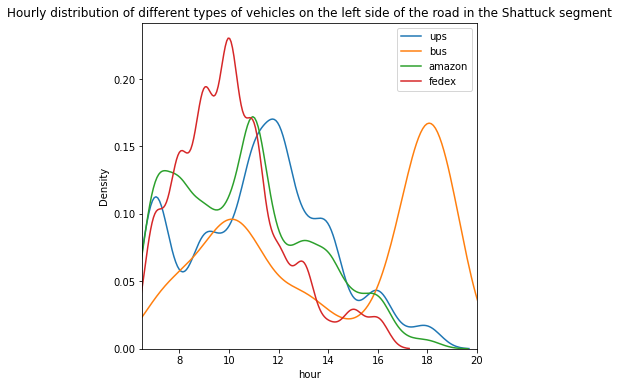

In [61]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Shattuck'")
bus = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'bus' & side_of_road == 'left' & Segment == 'Shattuck'")
amazon = df[['hour', 'obj_class_name', 'side_of_road', 'Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Shattuck'")
fedex = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left' & Segment == 'Shattuck'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road in the Shattuck segment')

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road in the College Ave segment')

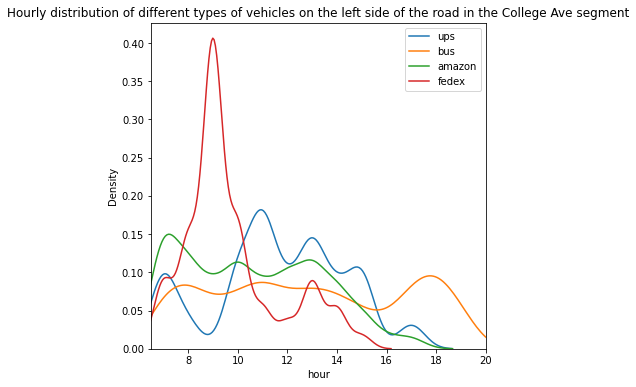

In [62]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'College Ave'")
bus = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'bus' & side_of_road == 'left' & Segment == 'College Ave'")
amazon = df[['hour', 'obj_class_name', 'side_of_road', 'Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'College Ave'")
fedex = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left' & Segment == 'College Ave'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road in the College Ave segment')

Text(0.5, 1.0, 'Hourly distribution of different types of vehicles on the left side of the road in the Bus Stop segment')

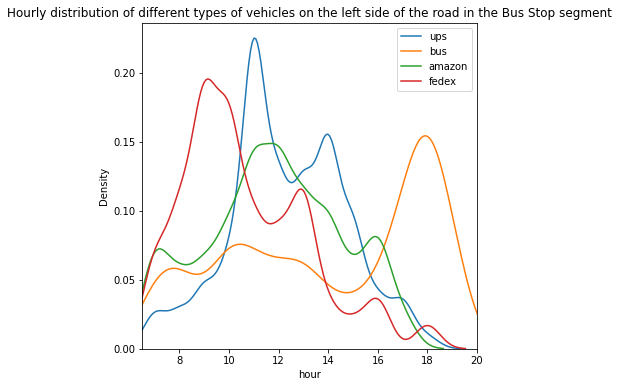

In [63]:
plt.figure(figsize=(6, 6))
ups = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
bus = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'bus' & side_of_road == 'left' & Segment == 'Bus Stop'")
amazon = df[['hour', 'obj_class_name', 'side_of_road', 'Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
fedex = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'fedex_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")

bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups['hour'], bw=0.2, label='ups')
sns.kdeplot(data = bus['hour'], bw=0.2, label='bus')
sns.kdeplot(data = amazon['hour'], bw=0.2, label='amazon')
sns.kdeplot(data = fedex['hour'], bw=0.2, label='fedex')
plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of different types of vehicles on the left side of the road in the Bus Stop segment')

Text(0.5, 1.0, 'Hourly distribution of UPS on the left side of the road in various segments')

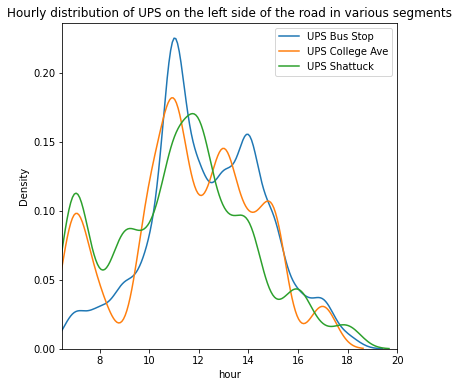

In [64]:
plt.figure(figsize=(6, 6))
ups_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
ups_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'College Ave'")
ups_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'left' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups_bstop['hour'], bw=0.2, label='UPS Bus Stop')
sns.kdeplot(data = ups_collave['hour'], bw=0.2, label='UPS College Ave')
sns.kdeplot(data = ups_shattuck['hour'], bw=0.2, label='UPS Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of UPS on the left side of the road in various segments')

Text(0.5, 1.0, 'Hourly distribution of Amazon on the left side of the road in various segments')

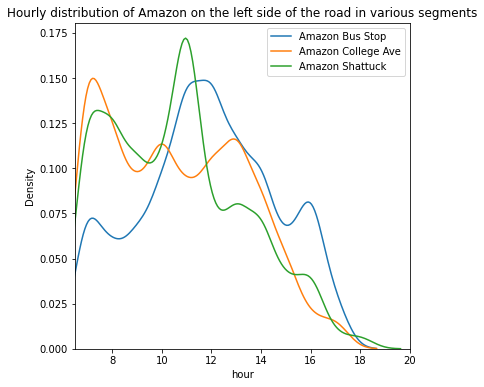

In [65]:
plt.figure(figsize=(6, 6))
amazon_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Bus Stop'")
amazon_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'College Ave'")
amazon_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'left' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = amazon_bstop['hour'], bw=0.2, label='Amazon Bus Stop')
sns.kdeplot(data = amazon_collave['hour'], bw=0.2, label='Amazon College Ave')
sns.kdeplot(data = amazon_shattuck['hour'], bw=0.2, label='Amazon Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of Amazon on the left side of the road in various segments')

Text(0.5, 1.0, 'Hourly distribution of UPS on the right side of the road in various segments')

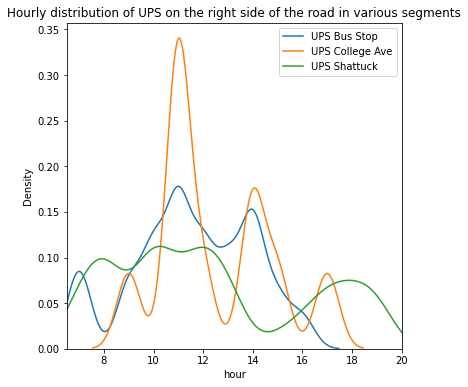

In [66]:
plt.figure(figsize=(6, 6))
ups_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'right' & Segment == 'Bus Stop'")
ups_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'right' & Segment == 'College Ave'")
ups_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'ups_truck' & side_of_road == 'right' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = ups_bstop['hour'], bw=0.2, label='UPS Bus Stop')
sns.kdeplot(data = ups_collave['hour'], bw=0.2, label='UPS College Ave')
sns.kdeplot(data = ups_shattuck['hour'], bw=0.2, label='UPS Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of UPS on the right side of the road in various segments')

Text(0.5, 1.0, 'Hourly distribution of Amazon on the right side of the road in various segments')

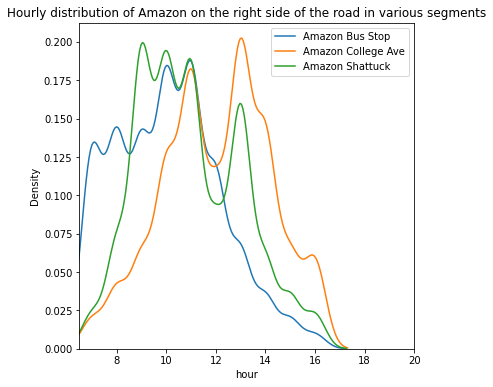

In [67]:
plt.figure(figsize=(6, 6))
amazon_bstop = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right' & Segment == 'Bus Stop'")
amazon_collave = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right' & Segment == 'College Ave'")
amazon_shattuck = df[['hour', 'obj_class_name', 'side_of_road','Segment']].query("obj_class_name == 'amazon_truck' & side_of_road == 'right' & Segment == 'Shattuck'")


bins = [i for i in range(6,20)]
kde_kws = {"bw": 0.2}

sns.kdeplot(data = amazon_bstop['hour'], bw=0.2, label='Amazon Bus Stop')
sns.kdeplot(data = amazon_collave['hour'], bw=0.2, label='Amazon College Ave')
sns.kdeplot(data = amazon_shattuck['hour'], bw=0.2, label='Amazon Shattuck')

plt.legend();
plt.xlim([6.5, 20])
plt.title('Hourly distribution of Amazon on the right side of the road in various segments')